In [1]:
import datetime
import logging
import openai
import os
import pandas as pd
import seaborn as sns
import sys
# import torch
import warnings


#from dotenv import load_dotenv
from lida import Manager, TextGenerationConfig, llm
from lida.utils import plot_raster
from llmx.generators.text.openai_textgen import OpenAITextGenerator
from llmx.generators.text.textgen import sanitize_provider

In [3]:
text_gen = llm(
    provider="openai",
    api_type="azure",
    azure_endpoint="https://test-autogen.openai.azure.com/",
    api_key="525928007ca5489eb783a2e03960cba0",
    api_version="2023-03-15-preview"
) # for azure openai

lida = Manager(text_gen=text_gen)

In [2]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="test-gpt-4o", use_cache=True)

summary = lida.summarize(
    df,
    summary_method="default", 
    textgen_config=textgen_config
)  


In [6]:
summary["field_names"]

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [7]:
summary

{'name': '',
 'file_name': '',
 'dataset_description': '',
 'fields': [{'column': 'Id',
   'properties': {'dtype': 'number',
    'std': 43,
    'min': 1,
    'max': 150,
    'samples': [74, 19, 119],
    'num_unique_values': 150,
    'semantic_type': '',
    'description': ''}},
  {'column': 'SepalLengthCm',
   'properties': {'dtype': 'number',
    'std': 0.828066127977863,
    'min': 4.3,
    'max': 7.9,
    'samples': [6.2, 4.5, 5.6],
    'num_unique_values': 35,
    'semantic_type': '',
    'description': ''}},
  {'column': 'SepalWidthCm',
   'properties': {'dtype': 'number',
    'std': 0.4335943113621737,
    'min': 2.0,
    'max': 4.4,
    'samples': [2.3, 4.0, 3.5],
    'num_unique_values': 23,
    'semantic_type': '',
    'description': ''}},
  {'column': 'PetalLengthCm',
   'properties': {'dtype': 'number',
    'std': 1.7644204199522626,
    'min': 1.0,
    'max': 6.9,
    'samples': [6.7, 3.8, 3.7],
    'num_unique_values': 43,
    'semantic_type': '',
    'description': ''}},

In [8]:
goals = lida.goals(summary, n=5, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of SepalLengthCm across different species?

**Visualization:** `box plot of SepalLengthCm grouped by Species`

**Rationale:** A box plot will allow us to compare the spread and central tendency of SepalLengthCm across the different species, helping us understand if certain species have significantly different sepal lengths.



### Goal 1
---
**Question:** Is there a correlation between PetalLengthCm and PetalWidthCm?

**Visualization:** `scatter plot of PetalLengthCm vs PetalWidthCm`

**Rationale:** A scatter plot will help us visualize the relationship between PetalLengthCm and PetalWidthCm. This can reveal if there is a linear or non-linear relationship between these two variables.



### Goal 2
---
**Question:** How do the distributions of SepalWidthCm vary across different species?

**Visualization:** `violin plot of SepalWidthCm grouped by Species`

**Rationale:** A violin plot will show the distribution of SepalWidthCm for each species, including the density of the data at different values, which can be more informative than a box plot for understanding the distribution shape.



### Goal 3
---
**Question:** What is the relationship between SepalLengthCm and SepalWidthCm across different species?

**Visualization:** `facet grid of scatter plots of SepalLengthCm vs SepalWidthCm for each Species`

**Rationale:** Facet grids will allow us to compare the relationship between SepalLengthCm and SepalWidthCm across different species side by side, highlighting any species-specific trends.



### Goal 4
---
**Question:** What are the average measurements (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) for each species?

**Visualization:** `bar chart of average measurements for each species`

**Rationale:** A bar chart summarizing the average measurements for each species will provide a clear comparison of the central tendencies of these variables across species, helping to identify distinguishing characteristics.


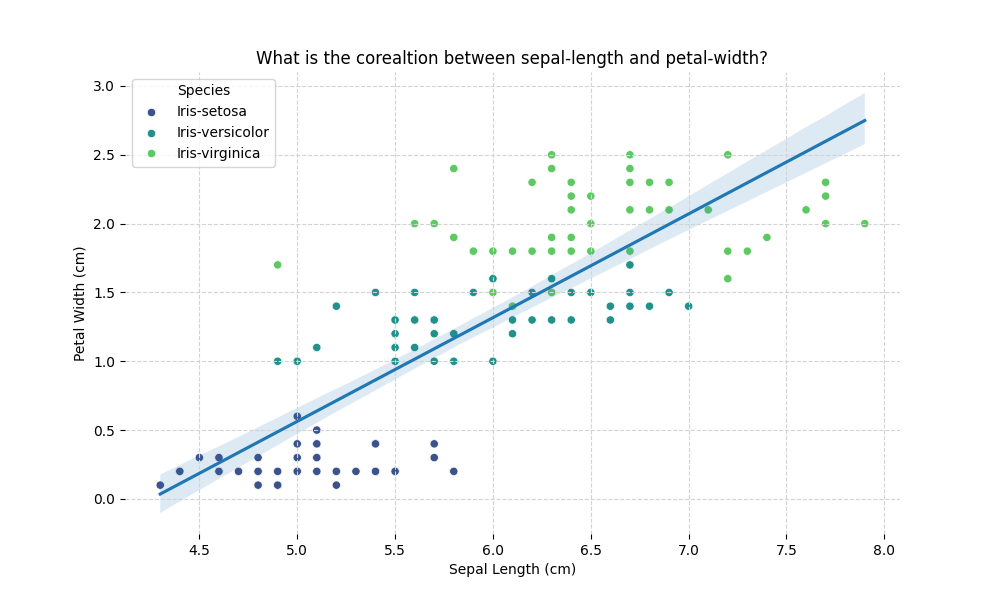

In [9]:
user_query = "What is the corealtion between sepal-length and petal-width?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

In [ ]:
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal = goals[0], textgen_config=textgen_config)  
charts[0]